In [1]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm



from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin

In [2]:
Data = pd.read_csv('data_rrhh.csv')

In [5]:
Data.shape

(1000, 9)

In [3]:
Data.head(5)

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


C:\Users\Windows\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Las variables disponibles son:
* **job title**: el título del trabajo (por ejemplo, "Diseñador gráfico", "Ingeniero de software", etc.);
* **gender**: hombre o mujer;
* **age**: edad;
* **performance**: en una escala del 1 al 5, siendo 1 el más bajo y 5 el más alto;
* **education**: diferentes niveles de educación (por ejemplo, "Universidad", "Doctorado", "Maestría", "Escuela secundaria");
* **department**: diferentes departamentos de la organización (por ejemplo, "Operaciones", "Gestión", etc.);
* **seniority**: en una escala de 1 a 5, siendo 1 la más baja y 5 la más alta;
* **income, bonus**: ambos expresados en dólares

Como estamos interesados en la compensación total, creemos una nueva columna llamada pay:

In [6]:
Data['pay'] = Data['income'] + Data['bonus']

**EDA

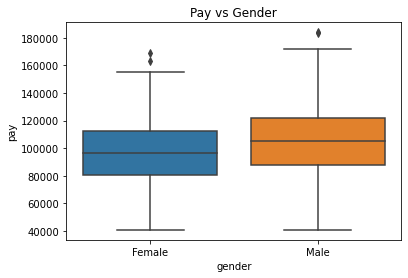

In [7]:
sns.boxplot(x='gender', y = 'pay', data = Data) 
plt.title("Pay vs Gender");

In [19]:
Data.groupby(["gender"])["pay"].mean()

gender
Female     96416.831197
Male      104918.678571
Name: pay, dtype: float64

La diferencia entre la media del salario de hombres y mujeres es de 8500 USD

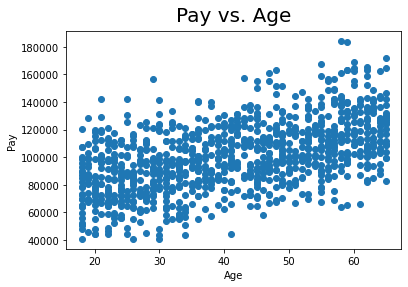

In [8]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Pay");

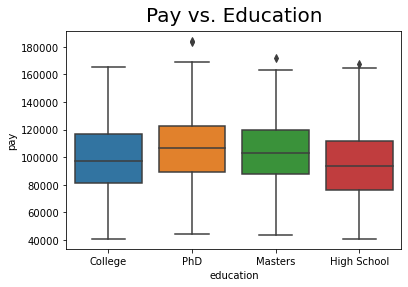

In [9]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

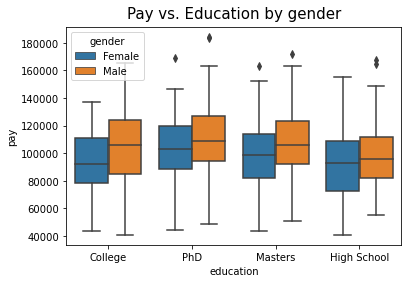

In [13]:
sns.boxplot(x='education', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Education by gender", fontsize=15, verticalalignment='bottom');

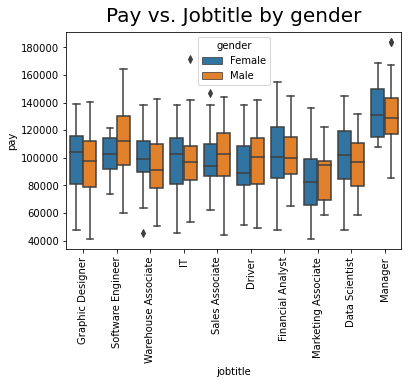

In [15]:
sns.boxplot(x='jobtitle', y = 'pay', hue = 'gender',data = Data) 
plt.title("Pay vs. Jobtitle by gender", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

In [ ]:
Modelo lineal, pago en relación a la edad y al genero 

In [17]:
model1 = 'pay~age + gender'
lm1    = sm.ols(formula = model1, data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           8.10e-84
Time:                        16:36:51   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

Si la edad aumenta en un año, se espera que el salario aumente en 948,5 USD. 
Para empleados de la misma edad, en promedio, los hombres ganan 9279,3180 USD más que las mujeres.

Modelo integrado teniendo en cuenta todas las variables

In [18]:
model4 = 'pay~jobtitle + age+ performance + education+department + seniority + gender'
lm4    = sm.ols(formula = model4, data = Data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:41:06   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Conclusiones 
Usamos las técnicas de regresión lineal para determinar si existía o no discriminación salarial basada en el género dentro de la organización. Modelamos el efecto de varias variables independientes para explicar la variación observada en una variable dependiente (en este caso, el salario). Observamos la estadística de R al cuadrado de nuestros modelos lineales para ayudarnos a medir qué porcentaje de la variación observada en el pago se explica por las variables independientes.

Vimos que la diferencia en el salario promedio entre hombres y mujeres es de unos 8500 USD en estos datos. Sin embargo, esta diferencia se convirtió en 400 USD y es estadísticamente indistinguible (valor p = 0.584) de cero después de controlar los otros factores correlacionados con el salario. Sin embargo, una exploración más profunda de los datos sugirió que las mujeres están desproporcionadamente sobrerrepresentadas en los trabajos peor pagados, mientras que los hombres están desproporcionadamente sobrerrepresentados en los trabajos mejor pagados.

Por lo tanto, se justifica una investigación sobre las prácticas de contratación, promoción y colocación laboral de hombres y mujeres. En su informe al departamento de recursos humanos, debe pedirles que analicen las siguientes preguntas:

¿Las mujeres eligen o se ven obligadas a aceptar trabajos peor pagados?
¿Se discrimina a las mujeres en los procesos de contratación para trabajos mejor remunerados?